In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

In [83]:
data = pd.read_table('../data-2/total4.15.txt',sep='\t',index_col=0)
data.index = data['ID'].tolist()
data =  data.drop('ID', axis=1)
data = data.replace("#DIV/0!", 0)
# data

In [84]:
sample = pd.read_table('sample.txt',sep='\t')
# sample = sample[['sample','type']]
color = sample['color'].tolist()
color

['#1597A5',
 '#1597A5',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#F66F69',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1597A5',
 '#1

In [85]:
X = np.array(data.T) 
pca = PCA(n_components=2,random_state=42)
X_pca = pca.fit_transform(X)

# Gets the proportion of variance explained for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Output PC1 and PC2 contributions
print("PC1 contribution:", explained_variance_ratio[0])
print("PC1 contribution:", explained_variance_ratio[1])

PC1的贡献度： 0.4213478943290301
PC2的贡献度： 0.1446168282604103


In [73]:
x_min, x_max = np.min(X_pca[:, 0]), np.max(X_pca[:, 0])
y_min, y_max = np.min(X_pca[:, 1]), np.max(X_pca[:, 1])

# Calculate the width and height
width = x_max - x_min
height = y_max - y_min

width = width/10000000
height = height/10000000

width,height

(27.057588842568894, 30.679740191644544)

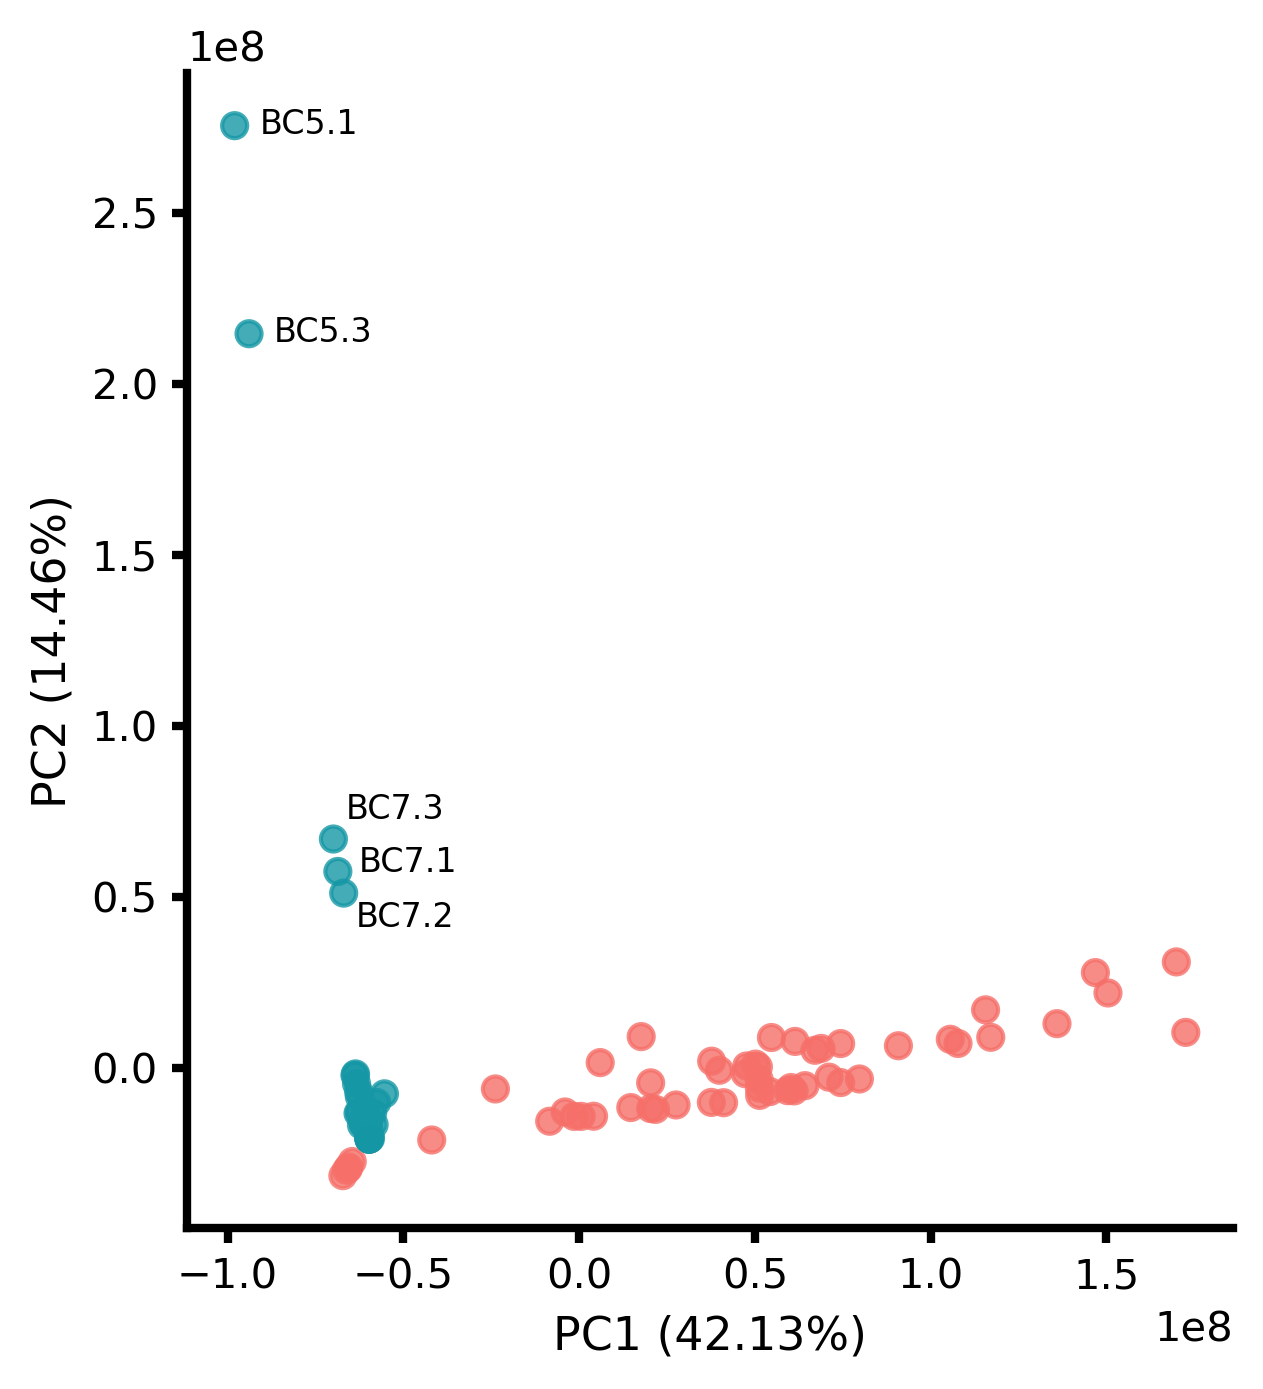

In [74]:
txt = data.columns.tolist()

# Draw PCA dimensionality reduction diagram
plt.figure(figsize=(4.5,5),dpi=300)
plt.scatter(X_pca[:, 0], X_pca[:, 1],alpha=0.8, c=color)

plt.annotate(txt[0], (X_pca[0, 0], X_pca[0, 1]), fontsize=8, xytext=(6, -2), textcoords='offset points')
plt.annotate(txt[1], (X_pca[1, 0], X_pca[1, 1]), fontsize=8, xytext=(6, -2), textcoords='offset points')
plt.annotate(txt[36], (X_pca[36,0], X_pca[36,1]), fontsize=8, xytext=(5, 0), textcoords='offset points') # BC7.1
plt.annotate(txt[37], (X_pca[37,0], X_pca[37,1]), fontsize=8, xytext=(3, -8), textcoords='offset points') # BC7.2
plt.annotate(txt[38], (X_pca[38,0], X_pca[38,1]), fontsize=8, xytext=(3,5), textcoords='offset points') # BC7.3

plt.xlabel('PC1 (42.13%)', fontsize=11)
plt.ylabel('PC2 (14.46%)', fontsize=11)
# plt.title('PCA Dimensionality Reduction')
# plt.grid(True)

# Hide top border and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Bold left and bottom borders
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
# Bold scale line
plt.gca().tick_params(axis='x', which='both', width=2)
plt.gca().tick_params(axis='y', which='both', width=2)

plt.savefig("PCA.png")
plt.savefig("PCA.pdf")

plt.show()


In [86]:
df = pd.DataFrame(data=X_pca,columns=['PC1','PC2'])
df['Sample'] = sample['sample']
df['type'] = sample['type']
df['color'] = sample['color']
df['class'] = 'Enzyme hydrolysate'
df.loc[df['color'] == '#1597A5', 'class'] = "canned"
df['class'] = pd.Categorical(df['class'])
df

,PC1,PC2,Sample,type,color,class
0,-9.799956e+07,2.753727e+08,BC5.1,BC5,#1597A5,canned
1,-9.390534e+07,2.145811e+08,BC5.3,BC5,#1597A5,canned
2,2.034198e+07,-1.181822e+07,17.2,17,#F66F69,Enzyme hydrolysate
3,4.103114e+06,-1.405821e+07,17.3,17,#F66F69,Enzyme hydrolysate
4,6.115565e+07,-6.653900e+06,28.4,28,#F66F69,Enzyme hydrolysate
...,...,...,...,...,...,...
86,-5.957544e+07,-1.984865e+07,PC2.2,PC2,#1597A5,canned
87,-5.971135e+07,-1.848181e+07,PC2.3,PC2,#1597A5,canned
88,-6.024271e+07,-1.536648e+07,PC3.1,PC3,#1597A5,canned
89,-6.069157e+07,-1.290575e+07,PC3.2,PC3,#1597A5,canned


In [78]:
df.to_csv('pca.result.csv')

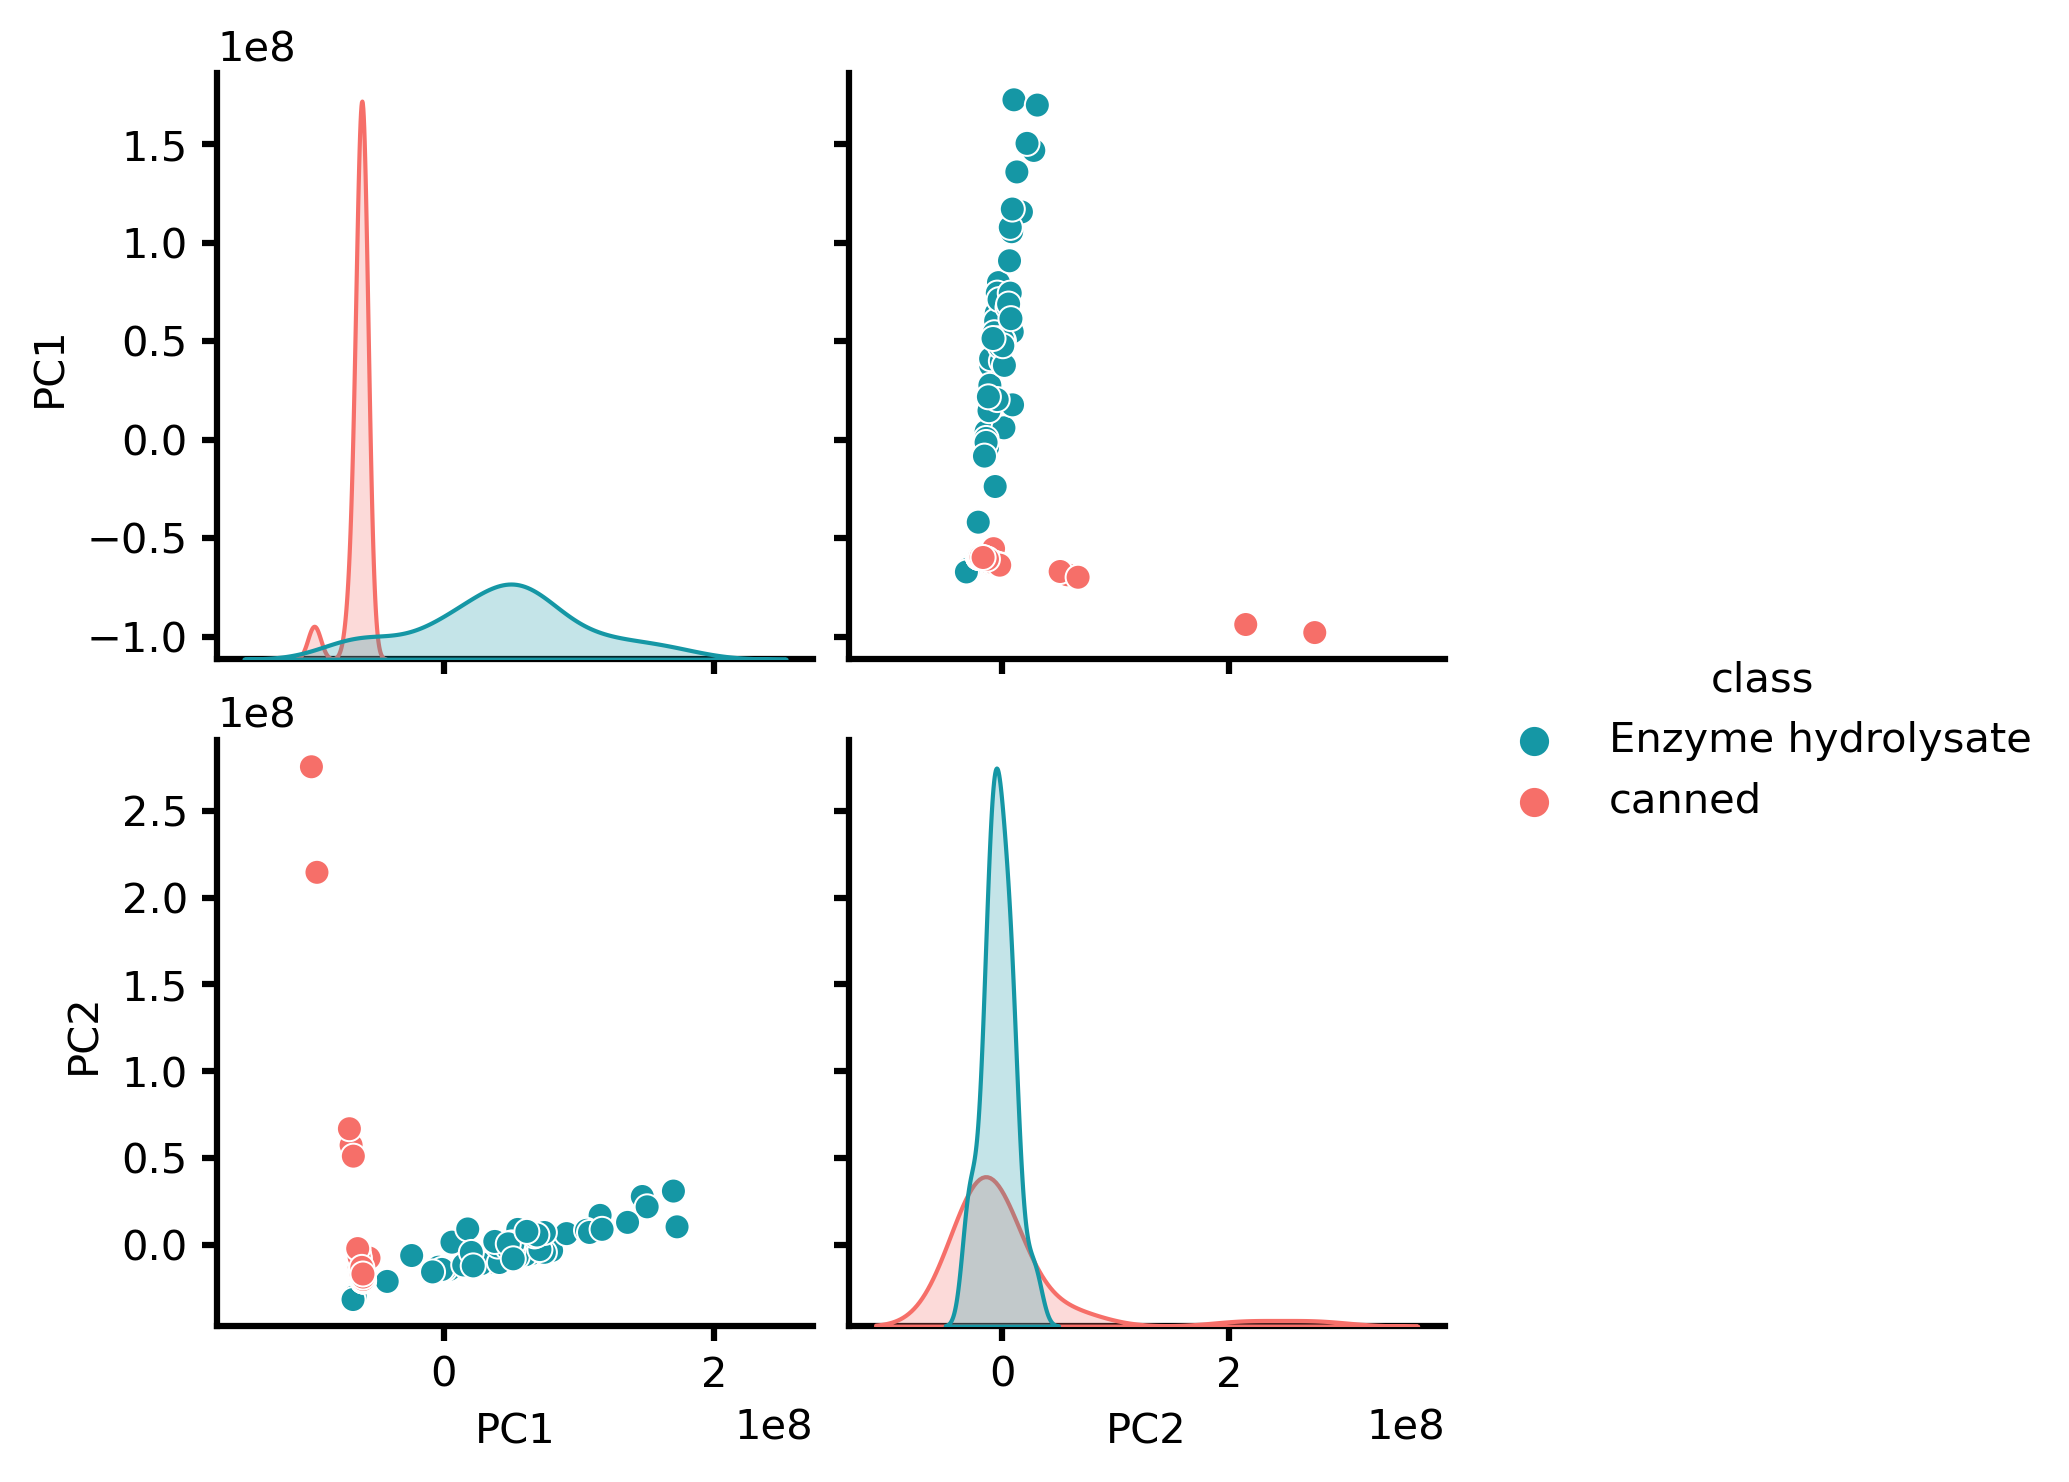

In [92]:
# Create a PairGrid object
g = sns.pairplot(df, hue='class', palette=['#1597A5', '#F66F69'])
# Set the resolution of each subgraph
for ax in g.axes.flat:
    ax.figure.set_dpi(300)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.tick_params(axis='x', which='both', width=1.5)
    ax.tick_params(axis='y', which='both', width=1.5)

# Display graphics
plt.savefig("PCA_desity.png")
plt.savefig("PCA_desity.pdf",dpi=300)

plt.show()